In [21]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
# from sklearn.cross_validation import train_test_split
# from sklearn.linear_model import LinearRegression

cities = ['深圳','上海','广州','北京','成都','杭州','重庆','西安','苏州','武汉',
          '南京','天津','郑州','长沙','东莞','佛山','宁波','青岛','沈阳','合肥']
pinyin = ['shenzhen','shanghai','guangzhou','beijing','chengdu','hangzhou','chongqing','xian','suzhou','wuhan',
          'nanjing','tianjin','zhengzhou','changsha','dongguan','foshan','ningbo','qingdao','shenyang','hefei']
myDict = {'date':[],'max':[],'min':[],'weather':[],'wind':[],'lrad':[],'prec':[],'pres':[],
          'shum':[],'srad':[],'tempDiff':[],'ris':[],'smb':[],'hml':[],'ret(-1)':[],'ret':[]}
date2I = {}

_ = 0
city=cities[_]
city2=pinyin[_]


In [22]:
def handleDate(date):
    date=list(map(int,date.split('-')))
    year=str(date[0])
    month=str(date[1]) if date[1]>9 else '0'+str(date[1])
    day=str(date[2]) if date[2]>9 else '0'+str(date[2])
    return year+'-'+month+'-'+day

In [23]:
def handleDate2(date):
    x=date.find('星期')
    y=date.find('周')
    z=max(x,y)
    if z==-1:
        return date
    else:
        return date[:z]

In [24]:

sourcePath = '/Users/rumeng/Downloads/qingzang/trainSet/'
num=0
with open(sourcePath+'climate2/'+city+'.json', 'r',encoding='utf-8-sig') as f:
    lines = f.readlines()
    for line in lines:
        climateInfo = json.loads(line)
        date=handleDate(climateInfo['date'])
        date2I[date]=num
        num+=1
        myDict['date'].append(date)
        myDict['max'].append(climateInfo['temp']['maxTemp'])
        myDict['min'].append(climateInfo['temp']['minTemp'])
        myDict['weather'].append('')
        myDict['wind'].append(climateInfo['wind'])##wind风速
        myDict['lrad'].append(climateInfo['lrad'])##lrad地面向下长波辐射
        myDict['prec'].append(climateInfo['prec'])##prec降水率
        myDict['pres'].append(climateInfo['pres'])##pres近地表气压
        myDict['shum'].append(climateInfo['shum'])##shum近地表空气比湿度
        myDict['srad'].append(climateInfo['srad'])##srad地面向下短波辐射 
        myDict['tempDiff'].append(climateInfo['tempDiff'])##与前一日的温差
        myDict['ris'].append('')##市场风险溢价因子
        myDict['smb'].append('')##市值因子
        myDict['hml'].append('')##账面市值比因子
        myDict['ret(-1)'].append('')##动量因子，前一日的组合收益率
        myDict['ret'].append('')##组合收益率
        
print(num)


6940


In [244]:
'''
with open(sourcePath+'weather/'+city2+'.json', 'r',encoding='utf-8-sig') as f:
    lines = f.readlines()
    for line in lines:
        weatherInfo = json.loads(line)
        time=handleDate2(weatherInfo['time'])
        i = date2I[time]
        if time!=myDict['date'][i]:
            console.log('error:', weatherInfo['time'], myDict['date'][i])
            break
        myDict['weather'][i]=weatherInfo['weather']
# print(myDict)
'''

In [245]:
'''
with open(sourcePath+'famaFrench.json', 'r',encoding='utf-8-sig') as f:
    lines = f.readlines()
    lastris=-1
    lastsmb=-1
    lasthml=-1
    for line in lines:
        famaInfo = json.loads(line)
        time=handleDate2(famaInfo['Trddt'])
        i = date2I[time]
#         print(time,i,myDict['date'][i+1])
        if time!=myDict['date'][i]:
            console.log('error:', famaInfo['time'], myDict['date'][i])
            break
        if i+1 == len(date2I):
            print(final)
            break
#         myDict['ris'][i]=famaInfo['RiskPremium']
#         myDict['smb'][i]=famaInfo['SMB']
#         myDict['hml'][i]=famaInfo['HML']    
        if lastris!=-1:
            myDict['ris'][i]=lastris
            myDict['smb'][i]=lastsmb
            myDict['hml'][i]=lasthml
        lastris=famaInfo['RiskPremium']
        lastsmb=famaInfo['SMB']
        lasthml=famaInfo['HML']    
print('0:',myDict['date'][0],myDict['ris'][0],myDict['smb'][0],myDict['hml'][0])
print('3:',myDict['date'][3],myDict['ris'][3],myDict['smb'][3],myDict['hml'][3])
# print(myDict)
'''

0: 2000-01-01   
3: 2000-01-04   


In [25]:

with open(sourcePath+'explainedVariable/'+city+'.json', 'r',encoding='utf-8-sig') as f:
    lines = f.readlines()
    print(len(lines))
    for line in lines:
#         print(line)
        eVariableInfo = json.loads(line)
#         print(eVariableInfo['portReturn'])
        time=handleDate2(eVariableInfo['Trddt'])
        i = date2I[time]
        if time!=myDict['date'][i]:
            console.log('error:', eVariableInfo['time'], myDict['date'][i])
            break
        myDict['ret'][i]=eVariableInfo['portReturn']
        if eVariableInfo['portReturn']>1:
            print(eVariableInfo)
            
sumofnull=0
for k in range(1,len(myDict['ret(-1)'])):
    myDict['ret(-1)'][k]=myDict['ret'][k-1]
    if myDict['ret'][k-1]=='':
        sumofnull+=1
# print(myDict)
# print(sumofnull)
print('0:',myDict['date'][0],myDict['ris'][0],myDict['smb'][0],myDict['hml'][0])
print('3:',myDict['date'][3],myDict['ris'][3],myDict['smb'][3],myDict['hml'][3])


4602
0: 2000-01-01   
3: 2000-01-04   


In [247]:
'''
# 转换为DataFrame的数据格式
myDf = DataFrame(myDict)
# print(myDf)
# print(myDf.describe())
#缺失值检验
myDf2 = myDf[['date','max','min','weather','wind','lrad','prec','pres',
              'shum','srad','tempDiff','ris','smb','hml','ret(-1)','ret']]
myDf2 = myDf2[myDf2!=''].dropna()
print(myDf2['srad'])
print(len(myDf))
print(len(myDf2))
myDf2.to_csv('/Users/rumeng/Downloads/qingzang/trainSet/data4/'+city+'.csv', encoding='utf-8-sig')
'''

4022     50.46
4023    104.62
4024     92.28
4028     51.36
4029     49.51
         ...  
6929    166.85
6933     45.08
6934    172.65
6935    143.64
6936    158.37
Name: srad, Length: 1527, dtype: object
6940
1527


In [44]:
sourcePath='/Users/rumeng/Downloads/qingzang/trainSet/data3/'
bigv_ds = []
for city in cities:
    bigv_ds.append(pd.read_csv(sourcePath+city+'.csv',error_bad_lines=False,encoding='utf-8-sig',engine='python'))
data = pd.concat(bigv_ds)
print(len(data))


/var/folders/97/t5p37xd91tbg2h4b_0h0x6t00000gn/T/ipykernel_6562/1090744607.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  bigv_ds.append(pd.read_csv(sourcePath+city+'.csv',error_bad_lines=False,encoding='utf-8-sig',engine='python'))
/var/folders/97/t5p37xd91tbg2h4b_0h0x6t00000gn/T/ipykernel_6562/1090744607.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  bigv_ds.append(pd.read_csv(sourcePath+city+'.csv',error_bad_lines=False,encoding='utf-8-sig',engine='python'))
/var/folders/97/t5p37xd91tbg2h4b_0h0x6t00000gn/T/ipykernel_6562/1090744607.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  bigv_ds.append(pd.read_csv(sourcePath+city+'.csv',error_bad_lines=False,encoding='utf-8-sig',engine='python'))
/

30533


/var/folders/97/t5p37xd91tbg2h4b_0h0x6t00000gn/T/ipykernel_6562/1090744607.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  bigv_ds.append(pd.read_csv(sourcePath+city+'.csv',error_bad_lines=False,encoding='utf-8-sig',engine='python'))


In [38]:
# 将天气转化为雪、雨、沙尘、云量、霾、雾、冰雹、晴天的哑变量
def handleWeather(weather):
    state=[0,0,0,0,0,0,0,0]
    weather=weather.replace('~','')
    if '暴雪' in weather:
        state[0]=4
    elif '大雪' in weather:
        state[0]=3
    elif '中雪' in weather:
        state[0]=2
    elif '雪' in weather:
        state[0]=1
        
    if '暴雨' in weather:
        state[1]=4
    elif '大雨' in weather:
        state[1]=3
    elif '中雨' in weather:
        state[1]=2
    elif '雨' in weather:
        state[1]=1
    
    if '沙尘暴' in weather:
        state[2]=3
    elif '扬沙' in weather:
        state[2]=2
    elif '浮尘' in weather:
        state[2]=1
        
    if '阴' in weather:
        state[3]=3 
    elif '多云' in weather:
        state[3]=2
    elif '少云' in weather:
        state[3]=1
        
    if '霾' in weather:
        state[4]=1
    if '雾' in weather:
        state[5]=1
    if '冰雹' in weather:
        state[6]=1
    if weather=='晴':
        state[7]=1
#     if sum(state)==0 and weather!='晴':
#         print(weather,state)
    return state
## 阵雪、阵雨、扬沙、雷雨、冰雹、雾、阴

In [46]:
# a=list(data['weather'].drop_duplicates(keep='first', inplace= False))
# a=list(data['weather'])
# for i in a:
#     handleWeather(i)
# print(a)
data.insert(0,'sun',0)
data.insert(0,'hail',0)
data.insert(0,'fog',0)
data.insert(0,'haze',0)
data.insert(0,'cloud',0)
data.insert(0,'sand',0)
data.insert(0,'rain',0)
data.insert(0,'snow',0)


data['min']=data['min'].map(lambda x:x-273.15-20)
data['max']=data['max'].map(lambda x:x-273.15-20)

weatherIndex=11 #data3
# weatherIndex=12 #data4
for i in range(len(data)):
    state=handleWeather(data.iloc[i,weatherIndex])
    data.iloc[i,0]=state[0]
    data.iloc[i,1]=state[1]
    data.iloc[i,2]=state[2]
    data.iloc[i,3]=state[3]
    data.iloc[i,4]=state[4]
    data.iloc[i,5]=state[5]
    data.iloc[i,6]=state[6]
    data.iloc[i,7]=state[7]
    


In [49]:
print(data['ret'].describe())
print(data['ris'].describe())
data['ret']=data['ret']-data['ris']
print(data['ret'].describe())

count    30533.000000
mean        -0.005875
std          0.013753
min         -0.091074
25%         -0.012039
50%         -0.005715
75%          0.000266
max          0.079067
Name: ret, dtype: float64
count    30533.000000
mean         0.000067
std          0.013730
min         -0.085087
25%         -0.005886
50%          0.000418
75%          0.006131
max          0.070628
Name: ris, dtype: float64
count    30533.000000
mean        -0.005942
std          0.003226
min         -0.025068
25%         -0.008258
50%         -0.006155
75%         -0.003920
max          0.026033
Name: ret, dtype: float64


In [50]:
print(data[['snow','rain','sand','cloud','haze','fog','hail','sun','max','min', 
            'weather','wind','prec','pres','tempDiff','ris','smb','hml','ret(-1)','ret']].corr())

              snow      rain      sand     cloud      haze       fog  \
snow      1.000000 -0.005108 -0.002180 -0.045352 -0.002045  0.012984   
rain     -0.005108  1.000000 -0.010972 -0.349424 -0.054865 -0.024305   
sand     -0.002180 -0.010972  1.000000 -0.017333 -0.002104 -0.001333   
cloud    -0.045352 -0.349424 -0.017333  1.000000 -0.069053 -0.029092   
haze     -0.002045 -0.054865 -0.002104 -0.069053  1.000000  0.051378   
fog       0.012984 -0.024305 -0.001333 -0.029092  0.051378  1.000000   
hail     -0.000593  0.025610 -0.000120 -0.006556 -0.000572 -0.000362   
sun      -0.049252 -0.270988 -0.010010 -0.544769 -0.047534 -0.030122   
max      -0.198871  0.116037 -0.000521 -0.009135 -0.100584 -0.043586   
min      -0.138783  0.222039 -0.006815 -0.035151 -0.114727 -0.038917   
wind      0.049051  0.058131  0.050879 -0.051519 -0.035813 -0.000025   
prec     -0.004507  0.596830 -0.007967 -0.207246 -0.036810 -0.017639   
pres      0.013281  0.007923  0.005961 -0.079914 -0.031679  0.00

In [296]:

sortRet=list(data['ret'])

# sortRet.sort()
# print(sortRet[-3053])
print(sum(i>0.008 for i in sortRet))
print(sum(i>=0 and i<0.008 for i in sortRet))
print(sum(i<0 and i>-0.01 for i in sortRet))
print(sum(i<=-0.01 for i in sortRet))
def handleRet(ret):
    if ret>0.008:
        return 4
    elif ret>=0:
        return 3
    elif ret>-0.01:
        return 2
    else:
        return 1

3042
4884
12996
9611


In [302]:
# ## 分类算法label标签类别划分
# for i in range(len(data)):
#     data.iloc[i,23]=handleRet(data.iloc[i,23])
# print(data['ret'].describe())

count    30533.000000
mean         2.044444
std          0.933437
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: ret, dtype: float64


In [337]:
print(data['min'].describe())

count    30533.000000
mean         8.745976
std         11.878692
min        -31.780000
25%          0.090000
50%         10.160000
75%         18.790000
max         30.799980
Name: min, dtype: float64


In [374]:
print(data.describe())
print(len(data))
print(data.columns)
#雪、雨、沙尘、云量、霾、雾、冰雹
print('雪snow',30533-list(data['snow']).count(0))
print('雨rain',30533-list(data['rain']).count(0))
print('沙尘sand',30533-list(data['sand']).count(0))
print('云量cloud',30533-list(data['cloud']).count(0))
print('霾haze',30533-list(data['haze']).count(0))
print('雾fog',30533-list(data['fog']).count(0))
print('冰雹hail',30533-list(data['hail']).count(0))
print('晴sun',30533-list(data['sun']).count(0))
print(data['ret'].describe())

               snow          rain          sand         cloud          haze  \
count  30533.000000  30533.000000  30533.000000  30533.000000  30533.000000   
mean       0.016507      0.451806      0.000852      1.368356      0.009891   
std        0.159391      0.792924      0.040459      1.194584      0.098962   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      2.000000      0.000000   
75%        0.000000      1.000000      0.000000      2.000000      0.000000   
max        4.000000      4.000000      3.000000      3.000000      1.000000   

                fog          hail           sun    Unnamed: 0           max  \
count  30533.000000  30533.000000  30533.000000  30533.000000  30533.000000   
mean       0.003996      0.000033      0.184456   5491.617332      2.626254   
std        0.063086      0.005723      0.387862    

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
# print(data[['max','min','wind','lrad','prec','pres',
#               'shum','tempDiff','ris','smb','hml','ret(-1)','ret']].corr())

exam_df=data[['snow','rain','sand','cloud','haze','fog','hail',
              'max','min','wind','lrad','prec','pres',
              'shum','srad','tempDiff','ris','smb','hml','ret(-1)','ret']]
# exam_df=data[['snow','rain','cloud',
#               'max','min','wind','prec','pres',
#               'tempDiff','smb','hml','ret(-1)','ret']]
# exam_df=exam_df.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
print(exam_df.describe())
exam_X=exam_df[['snow','rain','sand','cloud','haze','fog','hail',
              'max','min','wind','lrad','prec','pres',
              'shum','srad','tempDiff','ris','smb','hml','ret(-1)']]
# exam_X=exam_df[['snow','rain','cloud',
#                 'max','min','wind','prec','pres',
#                 'tempDiff','smb','hml','ret(-1)']]
# exam_X=exam_df[['ris','smb','hml','ret(-1)']]

# print(exam_df['srad'].isnull())
exam_Y=exam_df['ret']
#将原数据集拆分训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(exam_X,exam_Y,train_size=.8)
#X_train为训练数据标签,X_test为测试数据标签,exam_X为样本特征,exam_y为样本标签，train_size 训练数据占比
print("原始数据特征:",exam_X.shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
print("原始数据标签:",exam_Y.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)


               snow          rain          sand         cloud          haze  \
count  30533.000000  30533.000000  30533.000000  30533.000000  30533.000000   
mean       0.016507      0.451806      0.000852      1.368356      0.009891   
std        0.159391      0.792924      0.040459      1.194584      0.098962   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      2.000000      0.000000   
75%        0.000000      1.000000      0.000000      2.000000      0.000000   
max        4.000000      4.000000      3.000000      3.000000      1.000000   

                fog          hail           max           min          wind  \
count  30533.000000  30533.000000  30533.000000  30533.000000  30533.000000   
mean       0.003996      0.000033      2.626254    -11.254024      2.366524   
std        0.063086      0.005723      9.895780    

In [61]:
print(len(exam_df.ret))
print(len(exam_df['max']))

30533
30533


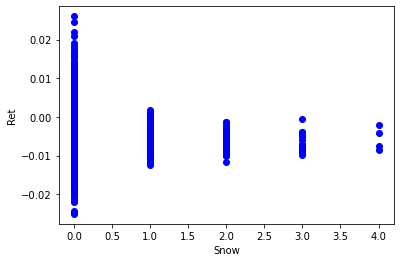

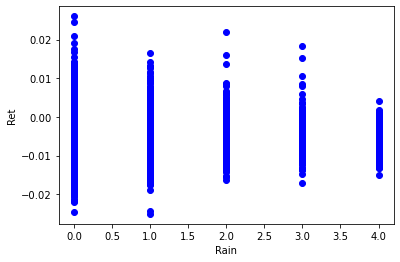

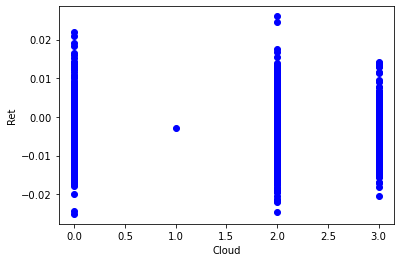

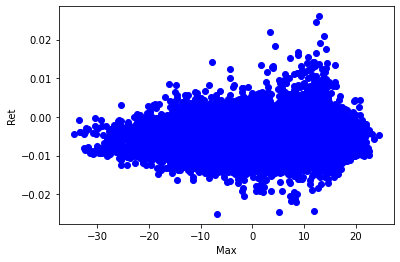

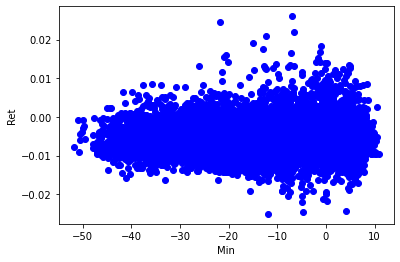

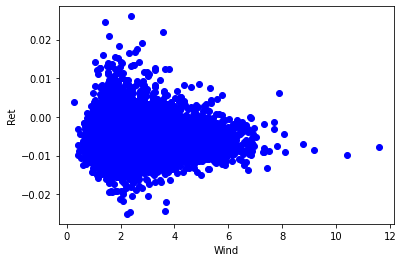

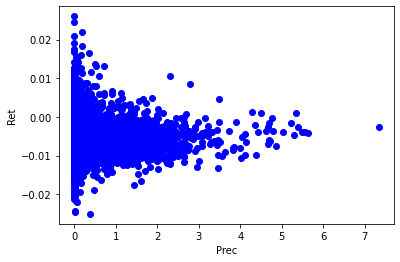

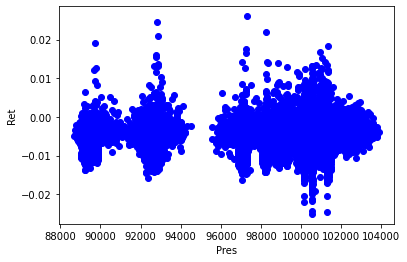

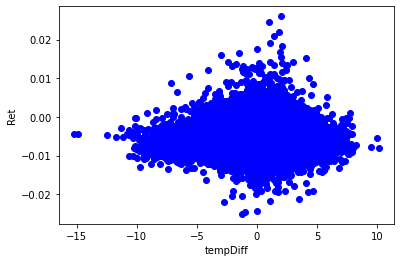

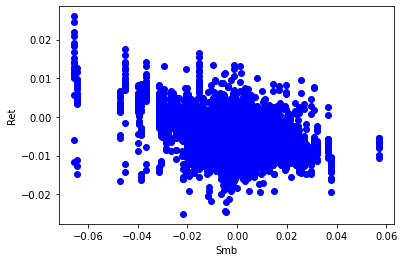

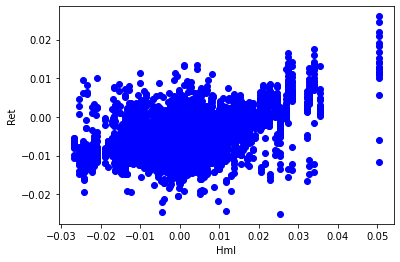

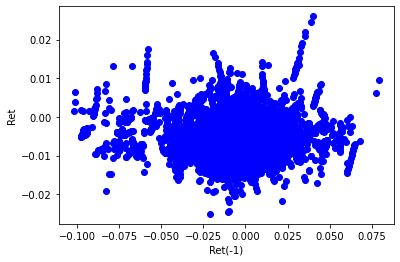

In [63]:
#绘制散点图
plt.scatter(exam_df.snow,exam_df.ret,color = 'b',label = "Exam Data")
#添加图的标签（x轴，y轴）
plt.xlabel("Snow")
plt.ylabel("Ret")
#显示图像
plt.show()

plt.scatter(exam_df.rain,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Rain")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.cloud,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Cloud")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df['max'],exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Max")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df['min'],exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Min")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.wind,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Wind")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.prec,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Prec")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.pres,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Pres")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.tempDiff,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("tempDiff")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.smb,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Smb")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df.hml,exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Hml")
plt.ylabel("Ret")
plt.show()

plt.scatter(exam_df['ret(-1)'],exam_df.ret,color = 'b',label = "Exam Data")
plt.xlabel("Ret(-1)")
plt.ylabel("Ret")
plt.show()

In [64]:

## 随机森林
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# 评估回归性能
# criterion ：
# 回归树衡量分枝质量的指标，支持的标准有三种：
# 1）输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为特征选择的标准，
# 这种方法通过使用叶子节点的均值来最小化L2损失
# 2）输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差
# 3）输入"mae"使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失

#此处使用mse
forest = RandomForestRegressor(n_estimators=100,
                               criterion='squared_error',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))


MSE train: 0.000, test: 0.000
R^2 train: 0.952, test: 0.672


In [56]:
##线性回归

model = LinearRegression()
model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)
flag=0
for i in X_train.columns:
    print(i,':',"%e"%b[flag])
    flag+=1

#训练数据的预测值
y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)
score1 = model.score(X_test,Y_test)
# score2 = r2_score(Y_test, y_test_pred)
print('test score:',score1)
# print('r2 score:',score2)

最佳拟合线:截距 -0.006956288820966704 ,回归系数： [-4.22950254e-04 -6.75761560e-04  6.17888225e-04 -3.27001923e-04
  3.85784329e-04 -1.16608861e-03  2.13587828e-17 -3.47921935e-07
 -5.42270878e-06 -4.62867001e-05  1.22410214e-06  4.38199288e-04
  1.53803413e-08  3.58267645e-02 -2.57821398e-06 -1.96108762e-05
 -7.63406423e-02  1.18049034e-01  2.26617479e-02]
snow : -4.229503e-04
rain : -6.757616e-04
sand : 6.178882e-04
cloud : -3.270019e-04
haze : 3.857843e-04
fog : -1.166089e-03
hail : 2.135878e-17
max : -3.479219e-07
min : -5.422709e-06
wind : -4.628670e-05
lrad : 1.224102e-06
prec : 4.381993e-04
pres : 1.538034e-08
shum : 3.582676e-02
srad : -2.578214e-06
tempDiff : -1.961088e-05
smb : -7.634064e-02
hml : 1.180490e-01
ret(-1) : 2.266175e-02
test score: 0.21230011124757975


In [88]:
import os
import joblib
 
# 创建文件目录
dirs = '/Users/rumeng/Downloads/qingzang/testModel'
if not os.path.exists(dirs):
    os.makedirs(dirs)
    
# 保存模型
joblib.dump(model, dirs+'/LR.pkl')

['/Users/rumeng/Downloads/qingzang/testModel/LR.pkl']

In [90]:
# 读取模型
LR = joblib.load(dirs+'/LR.pkl')
 
print('预测结果:\n', LR.predict(X_test))
print('实际结果:\n', Y_test)

预测结果:
 [0.62405448 0.51260198 0.43625597 ... 0.54314451 0.46683928 0.63559604]
实际结果:
 406     0.745782
989     0.566048
447     0.394817
448     0.525676
258     0.435642
          ...   
1052    0.517579
833     0.522790
583     0.562154
1409    0.486642
862     0.639449
Name: ret, Length: 6107, dtype: float64
